<a href="https://colab.research.google.com/github/vishnudas-bluefox/Heart-Disease-Prediction-/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
#read dataset
data=pd.read_csv("./heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#understand features 


#age - in years
#sex - (1 = male; 0 = female)
#cp - chest pain type
#trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#chol - serum cholestoral in mg/dl
#fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg - resting electrocardiographic results
#thalach - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest
#slope - the slope of the peak exercise ST segment
#ca - number of major vessels (0-3) colored by flourosopy
#thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
#target - 1 or 0

In [3]:
data.isnull().values.any()

False

In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


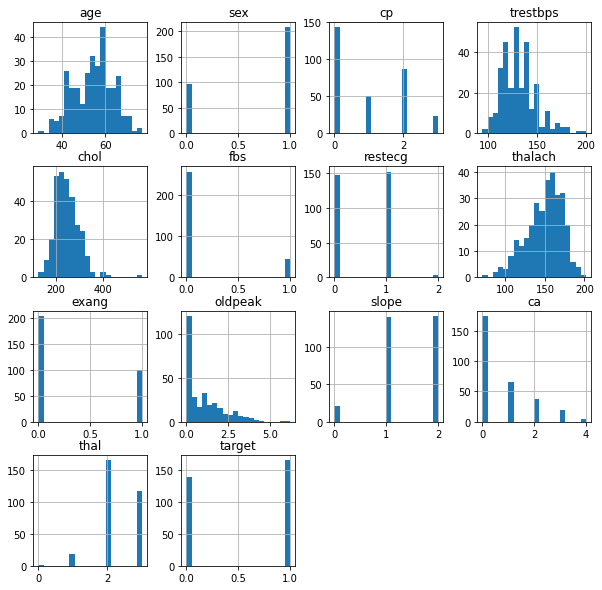

In [6]:
#histogram
data.hist(bins=20,figsize=(10,10))
plt.show()

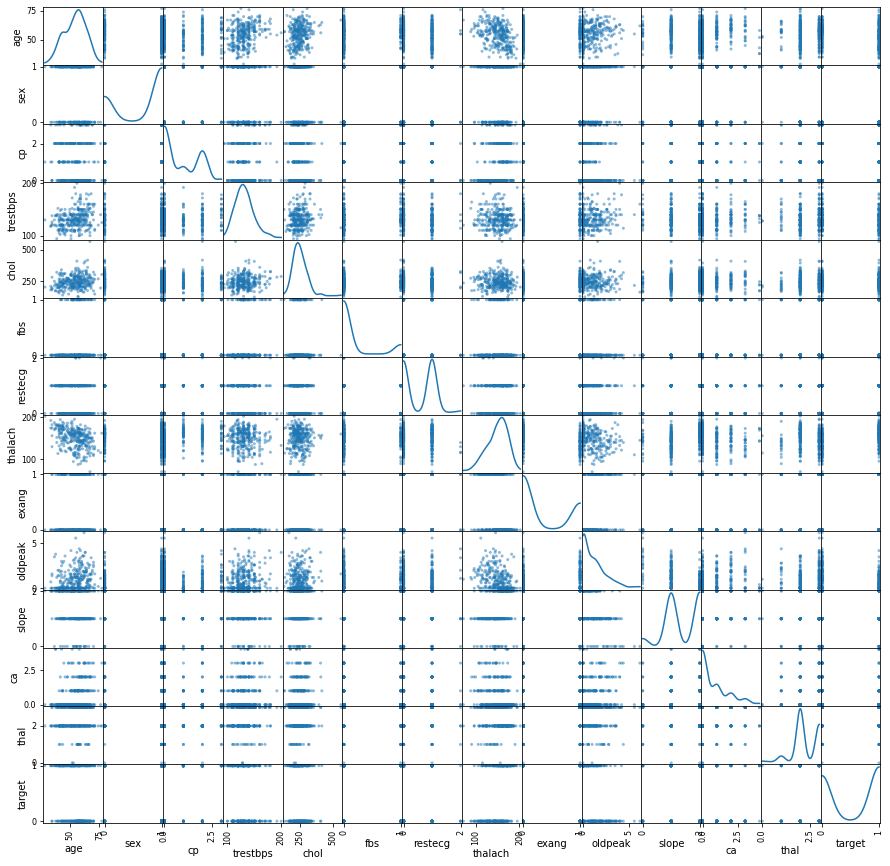

In [7]:
#scatter matrix
pd.plotting.scatter_matrix(data,figsize=(15,15),diagonal ='kde')
plt.show()

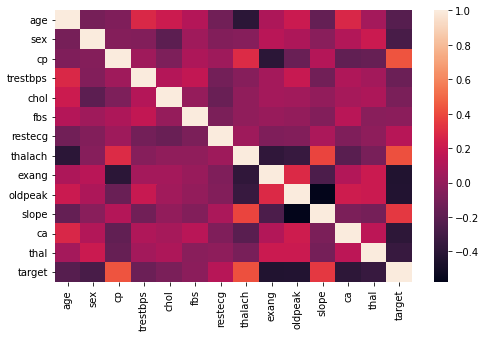

In [8]:
#correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(data.corr())

#In plot we can see there is higher correlation between target and cp (chest pain) ,target and thalach (heart rate)
#some attributes are independent to each other also as there is near 0 correlation

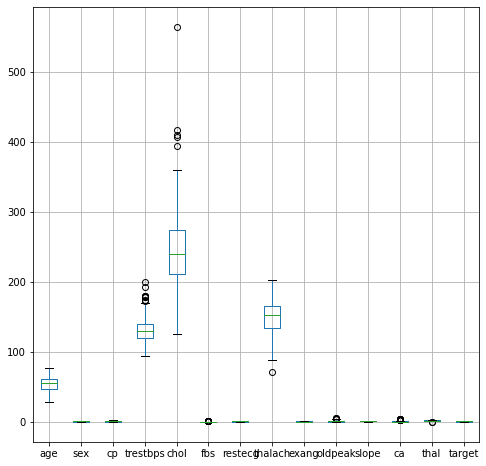

In [9]:
#box plot to see any outlier

data.boxplot(figsize=(8,8))
#we can clearly see our several varibles have outlier which will reduce the performance

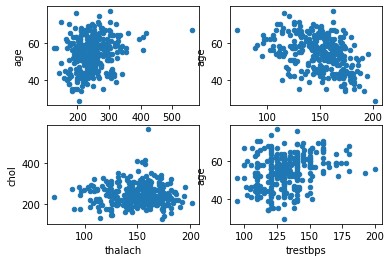

In [10]:
ax=plt.subplot(2,2,1)
data.plot(kind='scatter',y='age',x='chol',ax=ax)
#major of the data are within the 200-300
#We found one outlier the chol is more than 500

ax=plt.subplot(2,2,2)
data.plot(kind='scatter',y='age',x='thalach',ax=ax)

ax=plt.subplot(2,2,3)
data.plot(kind='scatter',y='chol',x='thalach',ax=ax)

ax=plt.subplot(2,2,4)
data.plot(kind='scatter',y='age',x='trestbps',ax=ax)
plt.show()

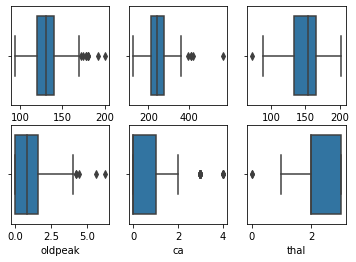

In [11]:
#each attribute outlier closer look
ax=plt.subplot(2,3,1)
sns.boxplot(x=data['trestbps'])

ax=plt.subplot(2,3,2)
sns.boxplot(x=data['chol'])

ax=plt.subplot(2,3,3)
sns.boxplot(x=data['thalach'])

ax=plt.subplot(2,3,4)
sns.boxplot(x=data['oldpeak'])

ax=plt.subplot(2,3,5)
sns.boxplot(x=data['ca'])

ax=plt.subplot(2,3,6)
sns.boxplot(x=data['thal'])

plt.show()

In [12]:
#outlier remove process...
#IQR inter quartile range

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

print((data < (Q1 - 1.5 * IQR))|(data > (Q3 + 1.5 * IQR)))


age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64
       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False   True    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False   True    Fa

In [13]:
#
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape
#more than 80 records deleted

((303, 14), (228, 14))

In [14]:
#extract feature and target
X=data_out.drop(columns=['target'])
y=data_out['target']

In [15]:
#split the dataset into train and test 10%
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((193, 13), (35, 13), (193,), (35,))

In [22]:
#Support Vector Machine Classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

clf=SVC(kernel='linear',gamma='scale')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.8571428571428571
ROC AUC score 0.8465909090909091


In [23]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=60)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.9142857142857143
ROC AUC score 0.9128787878787877


In [20]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

NameError: ignored

In [21]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

NameError: ignored

In [ ]:
#Naivye Bayes

from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.9428571428571428
ROC AUC score 0.9337121212121212
